<a href="https://colab.research.google.com/github/KeonhoChu/Health_Bio_AI/blob/main/Basic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

data = pd.read_csv('/content/drive/MyDrive/medical cost presonal datasets/insurance.csv')


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
#흡연 여부 데이터를 int형으로 변환시켜준다.
smoker = {'yes': 1, 'no': 0}
for key in smoker:
  data = data.replace(key, smoker[key])

In [ ]:
# 성별 데이터를 int형으로 변환시켜준다.
sex = {'female': 0, 'male': 1}
for key in sex:
  data = data.replace(key, sex[key])

In [ ]:
# 지역을 int데이터로 변환시켜준다.
region = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
for key in region:
  data = data.replace(key, region[key])

<Axes: >

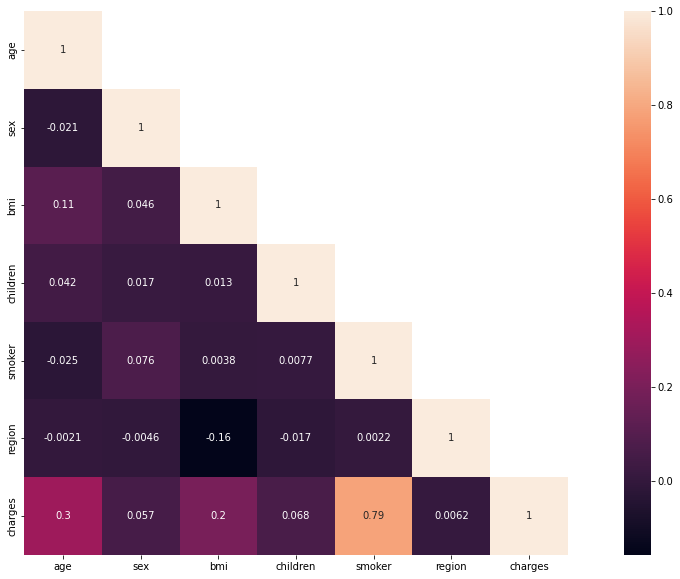

In [ ]:
corrmatt = data.corr() #data의 correlation matrix 생성
mask = np.array(corrmatt)
mask[np.tril_indices_from(mask)]=False # 하삼각행렬
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmatt,mask=mask,square= True, annot=True) # 히트맵 구현

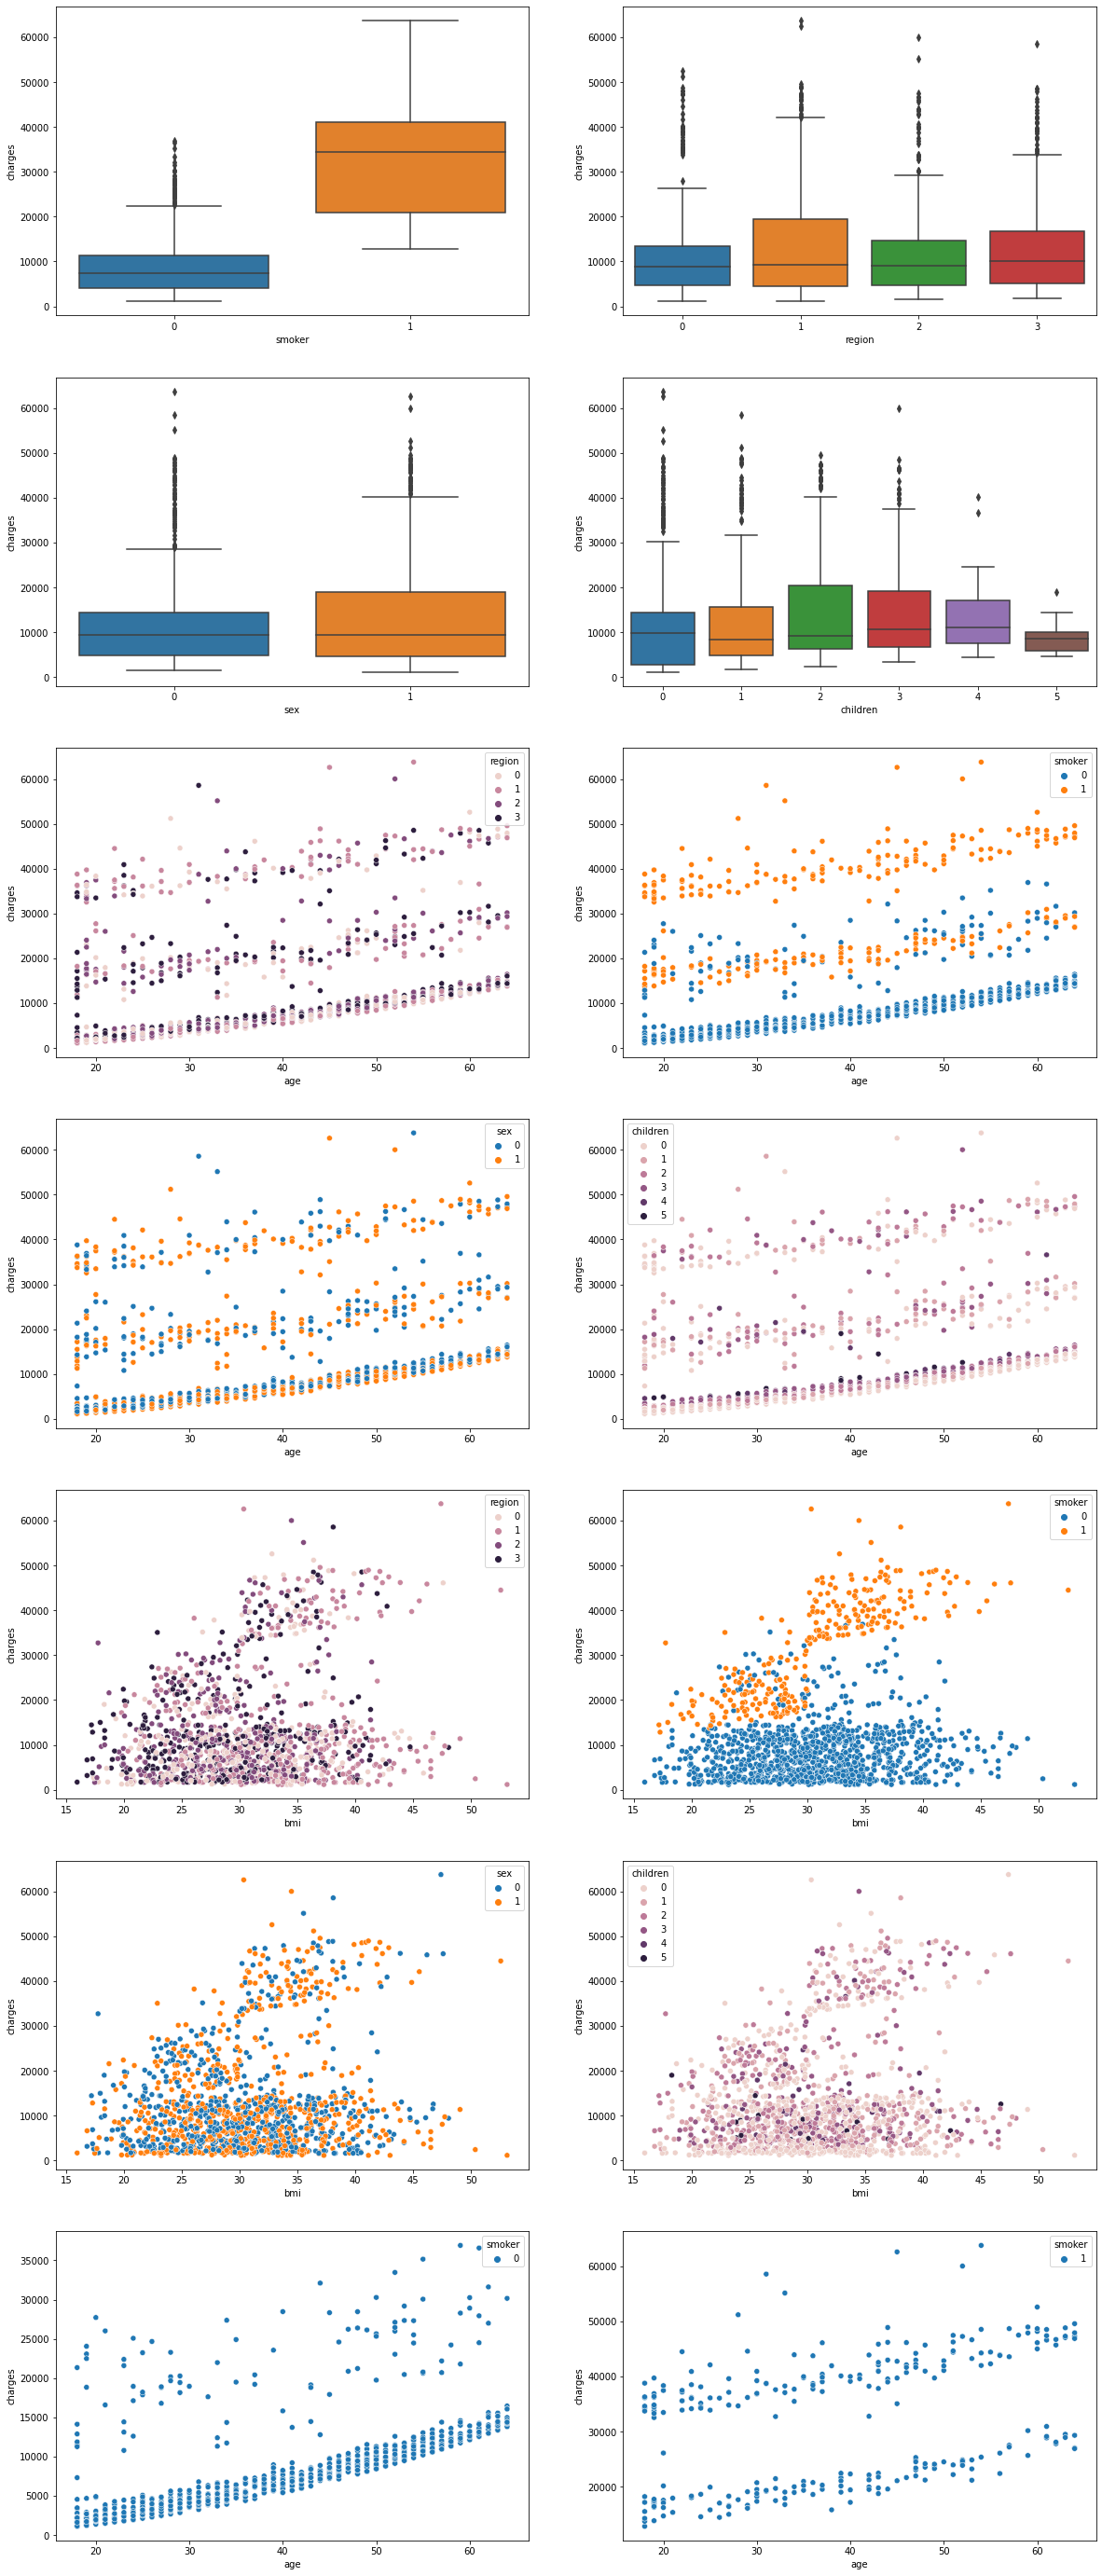

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2)
fig.set_size_inches(20,50)
sns.boxplot(data=data,y='charges', x='smoker',ax=axes[0][0]) # 지역별, 나이에 따른 비용
sns.boxplot(data=data,y='charges', x='region',ax=axes[0][1])
sns.boxplot(data=data,y='charges', x='sex',ax=axes[1][0])
sns.boxplot(data=data,y='charges', x='children',ax=axes[1][1])
sns.scatterplot(data=data,y='charges', x='age',hue='region',ax=axes[2][0])
sns.scatterplot(data=data,y='charges', x='age',hue='smoker',ax=axes[2][1]) #흡연 여부, 나이에 따른 비용
sns.scatterplot(data=data,y='charges', x='age',hue='sex',ax=axes[3][0]) #성별, 나이에 따른 비용
sns.scatterplot(data=data,y='charges', x='age',hue='children',ax=axes[3][1]) #흡연 여부, bmi지수에 따른 비용
sns.scatterplot(data=data,y='charges', x='bmi',hue='region',ax=axes[4][0]) # bmi기준 나이별 비용
sns.scatterplot(data=data,y='charges', x='bmi',hue='smoker',ax=axes[4][1]) # bmi기준 나이별 비용
sns.scatterplot(data=data,y='charges', x='bmi',hue='sex',ax=axes[5][0]) # bmi기준 나이별 비용
sns.scatterplot(data=data,y='charges', x='bmi',hue='children',ax=axes[5][1]) # bmi기준 나이별 비용
sns.scatterplot(data=data[data['smoker']==0],y='charges', x='age',hue='smoker',ax=axes[6][0]) # bmi기준 나이별 비용
sns.scatterplot(data=data[data['smoker']==1],y='charges', x='age',hue='smoker',ax=axes[6][1]) # bmi기준 나이별 비용
plt.rc('font', size=15)
plt.show()

In [ ]:
data_ns = data[data['smoker']==0] #비흡연자의 총 데이터
data_s = data[data['smoker']==1] #흡연자의 총 데이터


# 비흡연자 데이터 중 charges데이터에서 전체의 25%에 해당하는 데이터를 조회
charges_q1 = np.percentile(data_ns['charges'], 25)
charges_q1

# 비흡연자 데이터 중 charges데이터에서 전체의 25%에 해당하는 데이터를 조회
charges_q3 = np.percentile(data_ns['charges'], 75)
charges_q3

# IQR = Q3 - Q1
charges_IQR = charges_q3 - charges_q1
charges_IQR

# IQR에 1.5배하여 Q1데이터에 뺀 값보다 크고 Q3데이터에 더한 값보다 작은 값을 조회
# Q1과 Q3의 범위가 넓어진다. 그러나 이 범위에서도 벗어난 이상치들은 제거된다.
IQR = data_ns[(data_ns.charges >= (charges_q1 - (1.5 * charges_IQR))) &
                            (data_ns.charges <= (charges_q3 + (1.5 * charges_IQR)))]
data_IQR = IQR.append(data_s)
print(data_IQR)

      age  sex     bmi  children  smoker  region      charges
1      18    1  33.770         1       0       1   1725.55230
2      28    1  33.000         3       0       1   4449.46200
3      33    1  22.705         0       0       2  21984.47061
4      32    1  28.880         0       0       2   3866.85520
5      31    0  25.740         0       0       1   3756.62160
...   ...  ...     ...       ...     ...     ...          ...
1313   19    0  34.700         2       1       0  36397.57600
1314   30    0  23.655         3       1       2  18765.87545
1321   62    1  26.695         0       1       3  28101.33305
1323   42    0  40.370         2       1       1  43896.37630
1337   61    0  29.070         0       1       2  29141.36030

[1292 rows x 7 columns]


<ipython-input-8-fdd1d4d7a5f4>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_IQR = IQR.append(data_s)


<Axes: xlabel='age', ylabel='charges'>

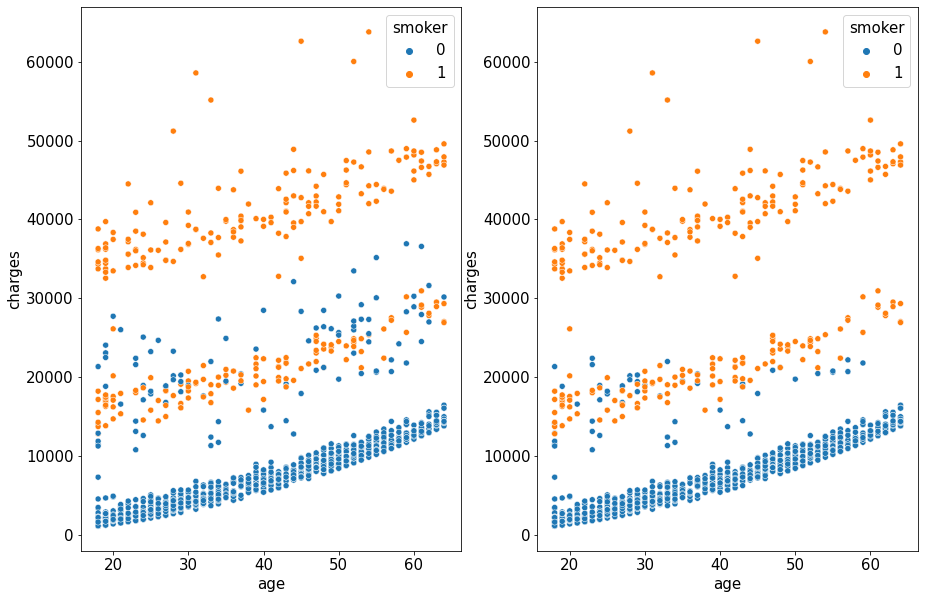

In [ ]:
# 흡연여부에 따른 나이별 비용 그래프를 통해 이상치처리가 되었는지 확인
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,10)
sns.scatterplot(data=data,y='charges', x='age',hue='smoker',ax=axes[0])
sns.scatterplot(data=data_IQR,y='charges', x='age',hue='smoker',ax=axes[1])

In [ ]:
# IQR 기법으로 이상치를 처리한 데이터를 독립변수와 종속변수로 나누어준다.
y_IQR = data_IQR['charges']
X_IQR = data_IQR.drop(['charges','region'], axis=1)
# PolynomialFeatures를 통해 3차원 선형 회귀로 만들어준다.
poly = PolynomialFeatures (degree=3)
X_poly_IQR = poly.fit_transform(X_IQR)
# 전처리한 데이터를 학습할 데이터와 테스트할 데이터를 나누어준다.
X_train, X_test, y_train, y_test = train_test_split(X_poly_IQR,y_IQR,train_size=0.8, random_state=20)
#선형회귀 함수를 불러준다.
lig_reg = LinearRegression()

#학습 데이터를 통해 머신러닝 학습
# plr 변수에 학습한 데이터를 할당
plr = lig_reg.fit(X_train, y_train)

### 학습데이터와 테스트데이터를 머신러닝으로 예측
# 학습 데이터로 예측
y_train_pred = plr.predict(X_train)

#테스트 데이터로 예측
y_test_pred = plr.predict(X_test)

# root mean squared error값을 구해준다.
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# r-square 값을 구해주어 소수점 2자리수까지 반올림하여 나타내준다.
r2 = round(plr.score(X_test, y_test), 2)
print('[dgree=3] \nRMSE is {}'.format(rmse))
print('R2.score is {}'.format(r2))
print('\n')

print(sm.OLS(y_test,X_test).fit().summary())

[dgree=3] 
RMSE is 2963.9333676732276
R2.score is 0.93


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     86.76
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          1.26e-113
Time:                        01:13:55   Log-Likelihood:                -2399.2
No. Observations:                 259   AIC:                             4886.
Df Residuals:                     215   BIC:                             5043.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

0.91578


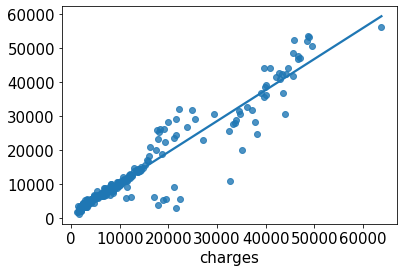

In [ ]:
gd = np.polyfit(y_test,y_test_pred,1)
sns.regplot(x=y_test, y=y_test_pred, ci=None)
print(round(gd[0],5))

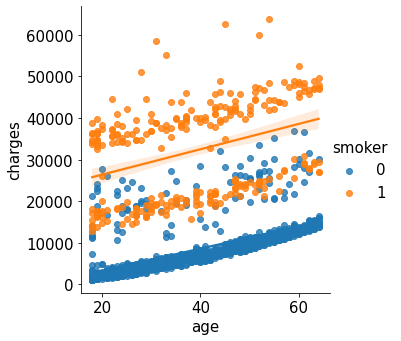

In [ ]:
sns.lmplot(data=data,y='charges', x='age',hue='smoker')